In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import warnings
warnings.filterwarnings('ignore')

from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [2]:
data=pd.read_csv('thyroid.csv')
data.head()

,29,F,f,f.1,f.2,f.3,f.4,f.5,f.6,t,...,f.14,?.1,f.15,?.2,f.16,?.3,f.17,?.4,other,-[840801013]
0,29,F,f,f,f,f,f,f,f,f,...,t,128,f,?,f,?,f,?,other,-[840801014]
1,41,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,11,other,-[840801042]
2,36,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,26,other,-[840803046]
3,32,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,36,other,S[840803047]
4,60,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,26,other,-[840803048]


In [3]:
data.drop("other",axis=1,inplace=True)

In [4]:
#from thyroid.names file
features = ["age",
            "sex",
            "on thyroxine",
            "query on thyroxine",
            "on antithyroid medication",
            "sick",
            "pregnant",
            "thyroid surgery",
            "I131 treatment",
            "query hypothyroid",
            "query hyperthyroid",
            "lithium",
            "goitre",
            "tumor",
            "hypopituitary",
            "psych",
            "TSH measured",
            "TSH",
            "T3 measured",
            "T3",
            "TT4 measured",
            "TT4",
            "T4U measured",
            "T4U",
            "FTI measured",
            "FTI",
            "TBG measured",
            "TBG",
            "target"]

data.columns = features
data.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,target
0,29,F,f,f,f,f,f,f,f,f,...,1.9,t,128,f,?,f,?,f,?,-[840801014]
1,41,F,f,f,f,f,f,f,f,f,...,?,f,?,f,?,f,?,t,11,-[840801042]
2,36,F,f,f,f,f,f,f,f,f,...,?,f,?,f,?,f,?,t,26,-[840803046]
3,32,F,f,f,f,f,f,f,f,f,...,?,f,?,f,?,f,?,t,36,S[840803047]
4,60,F,f,f,f,f,f,f,f,f,...,?,f,?,f,?,f,?,t,26,-[840803048]


In [5]:
data.drop(['query on thyroxine','lithium','TBG measured','TBG','T3 measured','TSH measured','TT4 measured','T4U measured','FTI measured'],axis=1,inplace=True)

In [6]:
#Spliting target accordig to the content provided in thyroid.names file
target = data.target
create = target.str.split('([A-Za-z]+)', expand=True)
create = create[1]
target = create.replace({None:'Z'}) 
data.target = target

data.target.unique()

array(['Z', 'S', 'F', 'AK', 'R', 'I', 'M', 'N', 'G', 'K', 'A', 'KJ', 'L',
       'MK', 'Q', 'J', 'C', 'O', 'LJ', 'H', 'D', 'GK', 'MI', 'P', 'FK',
       'B', 'GI', 'GKJ', 'OI', 'E'], dtype=object)

In [7]:
data.head()

,age,sex,on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,target
0,29,F,f,f,f,f,f,f,f,f,f,f,f,f,1.6,1.9,128,?,?,Z
1,41,F,f,f,f,f,f,f,f,t,f,f,f,f,?,?,?,?,?,Z
2,36,F,f,f,f,f,f,f,f,f,f,f,f,f,?,?,?,?,?,Z
3,32,F,f,f,f,f,f,f,f,f,f,f,f,f,?,?,?,?,?,S
4,60,F,f,f,f,f,f,f,f,f,f,f,f,f,?,?,?,?,?,Z


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9171 entries, 0 to 9170
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        9171 non-null   int64 
 1   sex                        9171 non-null   object
 2   on thyroxine               9171 non-null   object
 3   on antithyroid medication  9171 non-null   object
 4   sick                       9171 non-null   object
 5   pregnant                   9171 non-null   object
 6   thyroid surgery            9171 non-null   object
 7   I131 treatment             9171 non-null   object
 8   query hypothyroid          9171 non-null   object
 9   query hyperthyroid         9171 non-null   object
 10  goitre                     9171 non-null   object
 11  tumor                      9171 non-null   object
 12  hypopituitary              9171 non-null   object
 13  psych                      9171 non-null   object
 14  TSH     

In [9]:
#Handling Null Values

In [10]:
data=data.replace(['?'],np.nan)
data.isnull().sum()

age                             0
sex                           307
on thyroxine                    0
on antithyroid medication       0
sick                            0
pregnant                        0
thyroid surgery                 0
I131 treatment                  0
query hypothyroid               0
query hyperthyroid              0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH                           842
T3                           2603
TT4                           441
T4U                           808
FTI                           801
target                          0
dtype: int64

In [11]:
data.sex.unique()

array(['F', 'M', nan], dtype=object)

In [12]:
data.sex.replace({'F':0,'M':1},inplace=True)
round_Values = round(data.sex.mean())
data.sex.fillna(round_Values,inplace=True)
data.sex.unique()

array([0., 1.])

In [13]:
data["sex"].isnull().sum()

0

In [14]:
knnimp = KNNImputer(n_neighbors=3)
cols = ['age','TSH','T3','TT4','T4U','FTI']
for i in cols:
    data[i] = knnimp.fit_transform(data[[i]])
data.isnull().sum()

age                          0
sex                          0
on thyroxine                 0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH                          0
T3                           0
TT4                          0
T4U                          0
FTI                          0
target                       0
dtype: int64

In [15]:
data.head()

,age,sex,on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,target
0,29.0,0.0,f,f,f,f,f,f,f,f,f,f,f,f,1.600000,1.900000,128.000000,0.976056,113.640746,Z
1,41.0,0.0,f,f,f,f,f,f,f,t,f,f,f,f,5.218993,1.970629,108.700305,0.976056,113.640746,Z
2,36.0,0.0,f,f,f,f,f,f,f,f,f,f,f,f,5.218993,1.970629,108.700305,0.976056,113.640746,Z
3,32.0,0.0,f,f,f,f,f,f,f,f,f,f,f,f,5.218993,1.970629,108.700305,0.976056,113.640746,S
4,60.0,0.0,f,f,f,f,f,f,f,f,f,f,f,f,5.218993,1.970629,108.700305,0.976056,113.640746,Z


In [16]:
data.to_csv("unencoded_data.csv")

In [17]:
#EDA

In [18]:
#using label encoder to normalize values
le = LabelEncoder()
cols = data.select_dtypes(include=['object'])
for i in (cols.columns):
    try:
        data[i] = le.fit_transform(data[i])
    except:
        continue

In [19]:
data.corr()

,age,sex,on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,target
age,1.000000,0.014175,-0.007097,-0.002832,-0.002416,-0.003892,-0.002631,-0.001646,-0.004254,0.017797,-0.002733,-0.003746,-0.000600,-0.005211,-0.003979,0.003693,0.004122,-0.002045,0.004108,0.008899
sex,0.014175,1.000000,-0.100828,-0.023991,0.009071,-0.071881,-0.039090,-0.009602,-0.070774,-0.064765,-0.003912,-0.074613,0.006277,0.099687,-0.036723,-0.048890,-0.150479,-0.214723,-0.030149,0.087962
on thyroxine,-0.007097,-0.100828,1.000000,-0.010513,-0.047850,0.010490,0.018289,0.071485,0.112228,-0.031070,0.002150,-0.009141,0.015756,-0.065004,0.009900,-0.000978,0.209424,0.049814,0.154467,0.018541
on antithyroid medication,-0.002832,-0.023991,-0.010513,1.000000,-0.022344,0.024048,-0.005651,0.006257,-0.026853,0.101698,-0.010882,-0.018594,-0.001672,-0.024734,-0.008574,0.086607,0.004485,0.042759,-0.021172,-0.002553
sick,-0.002416,0.009071,-0.047850,-0.022344,1.000000,-0.021449,-0.009691,-0.027049,0.005464,-0.027752,-0.018980,-0.003730,-0.002916,-0.032134,-0.019782,-0.062216,-0.033375,-0.021176,-0.025129,0.012535
pregnant,-0.003892,-0.071881,0.010490,0.024048,-0.021449,1.000000,-0.004768,-0.014887,-0.021448,0.064867,0.032190,0.102761,-0.001605,-0.014006,-0.015850,0.137196,0.130208,0.281776,-0.019433,-0.109325
thyroid surgery,-0.002631,-0.039090,0.018289,-0.005651,-0.009691,-0.004768,1.000000,0.003586,-0.000685,0.019421,-0.011708,0.002719,-0.001798,-0.026610,0.014905,-0.008748,-0.010879,0.024903,-0.021282,0.029545
I131 treatment,-0.001646,-0.009602,0.071485,0.006257,-0.027049,-0.014887,0.003586,1.000000,0.052636,0.044211,-0.013174,-0.022509,-0.002024,-0.029942,0.003894,0.019831,-0.006417,0.015159,-0.013172,-0.000133
query hypothyroid,-0.004254,-0.070774,0.112228,-0.026853,0.005464,-0.021448,-0.000685,0.052636,1.000000,0.015709,-0.017033,-0.025700,-0.004008,-0.036547,0.054678,-0.050484,-0.017913,0.017630,-0.032968,-0.061339
query hyperthyroid,0.017797,-0.064765,-0.031070,0.101698,-0.027752,0.064867,0.019421,0.044211,0.015709,1.000000,-0.026577,0.028914,-0.004082,-0.054299,-0.018251,0.153464,0.097278,0.051374,0.068688,-0.077486


<Axes: >

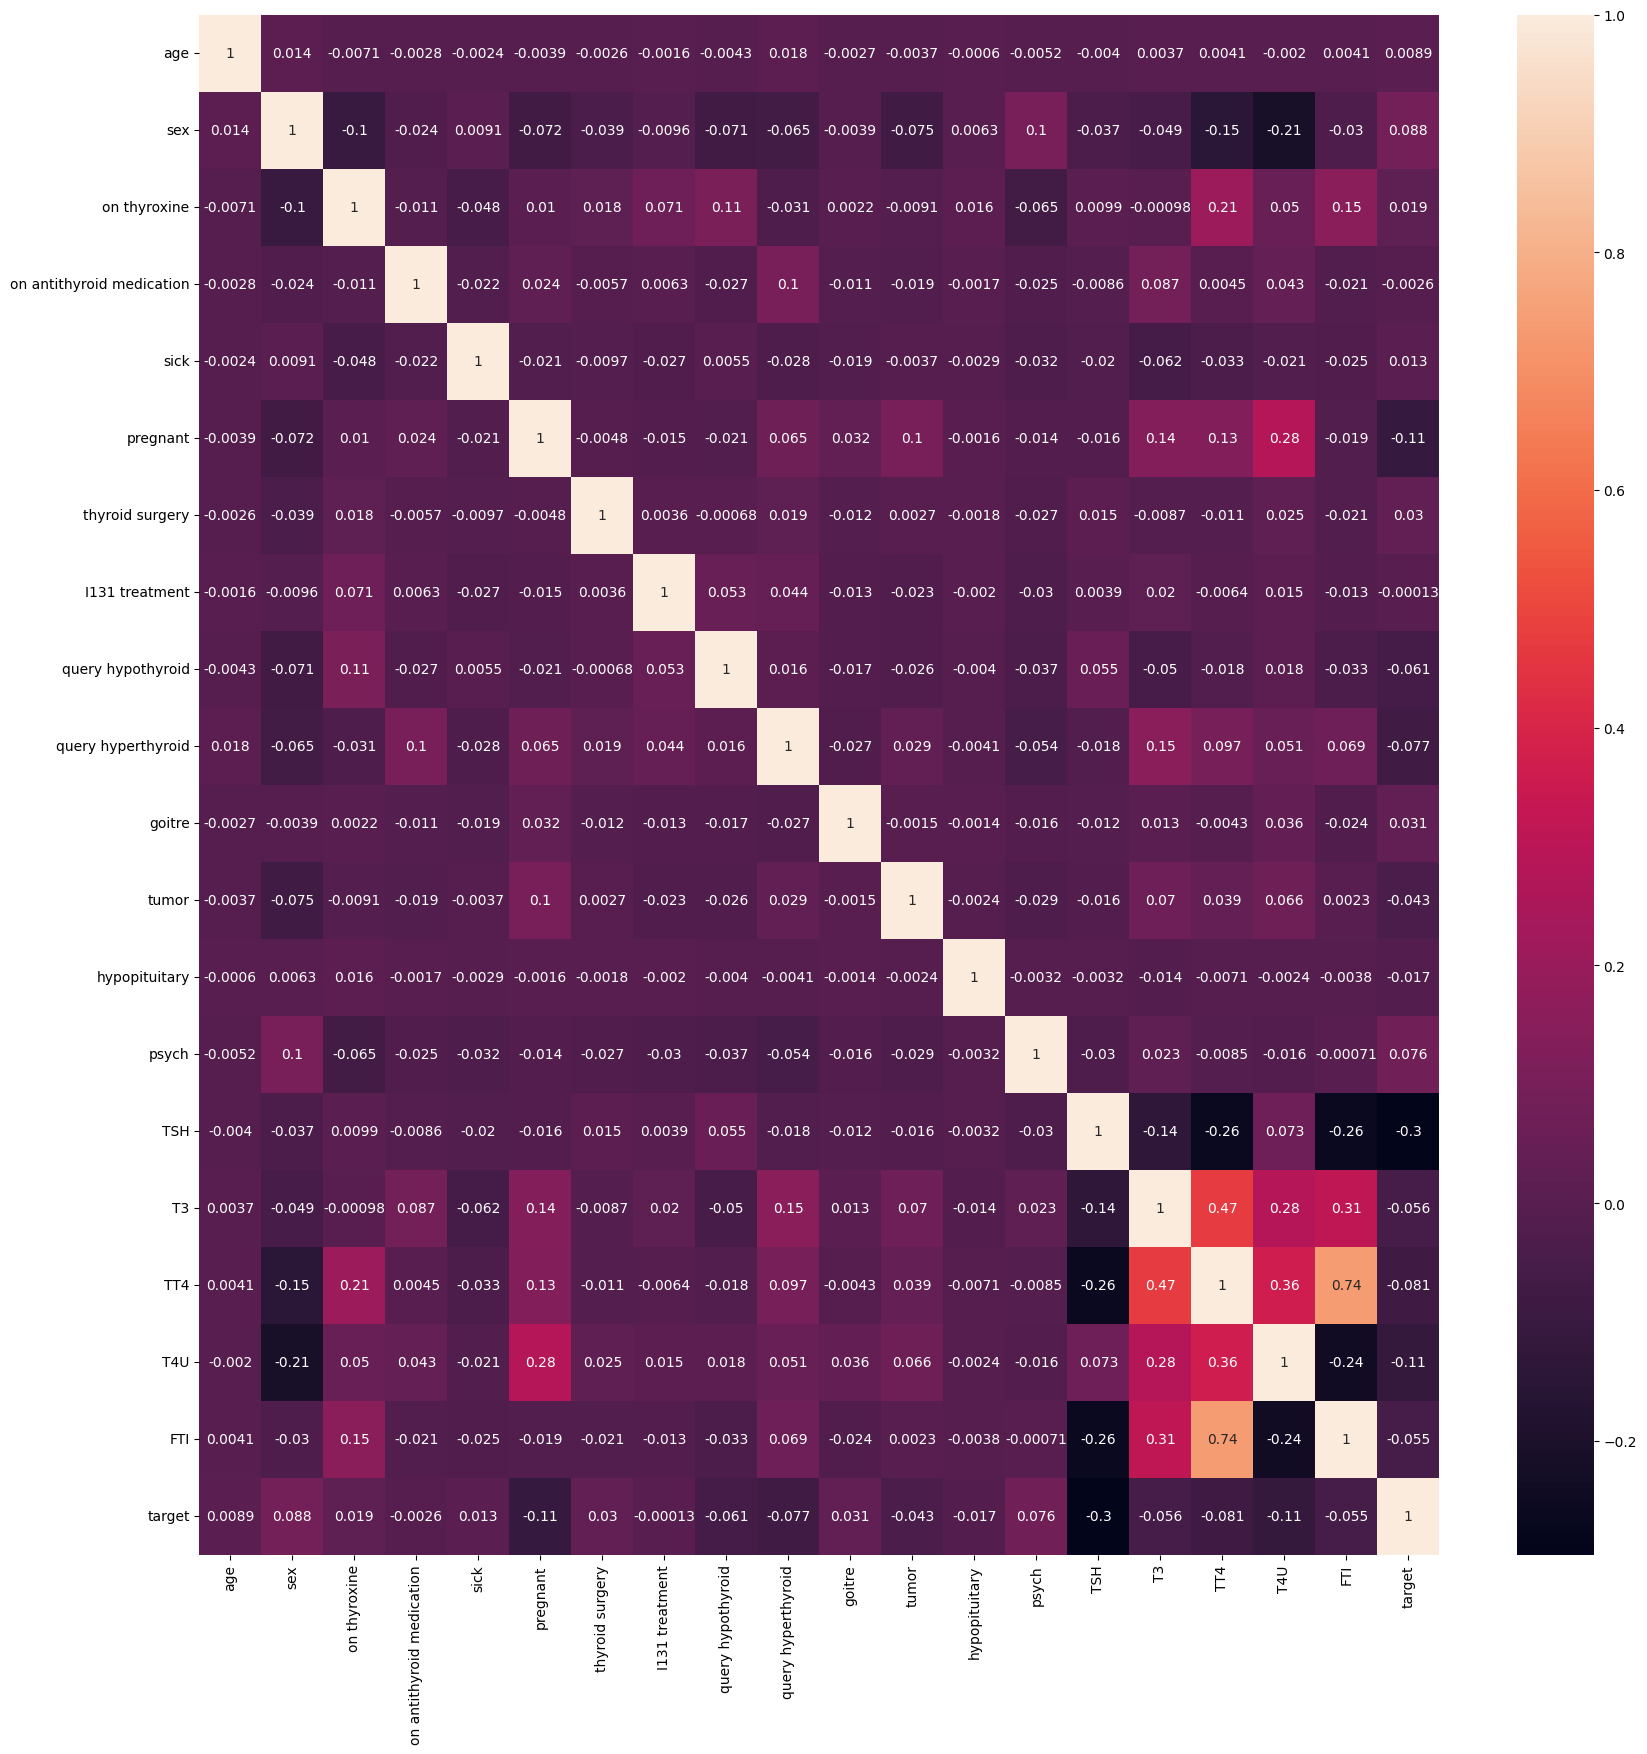

In [20]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True)

In [21]:
data.head()

,age,sex,on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,target
0,29.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1.600000,1.900000,128.000000,0.976056,113.640746,29
1,41.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,5.218993,1.970629,108.700305,0.976056,113.640746,29
2,36.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,5.218993,1.970629,108.700305,0.976056,113.640746,29
3,32.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,5.218993,1.970629,108.700305,0.976056,113.640746,28
4,60.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,5.218993,1.970629,108.700305,0.976056,113.640746,29


In [22]:
data['target'].unique()

array([29, 28,  6,  1, 27, 13, 19, 22,  8, 15,  0, 16, 17, 21, 26, 14,  3,
       23, 18, 12,  4, 10, 20, 25,  7,  2,  9, 11, 24,  5])

In [23]:
# finding correlation in some features
for i in range(len(data.corr())):
    for j in range(i):
        if((data.corr().iloc[i,j]) >= 0.7):
            print(data.corr().columns[j])

TT4


In [24]:
#removing column with high correlation
data.drop('TT4',axis=1,inplace=True)

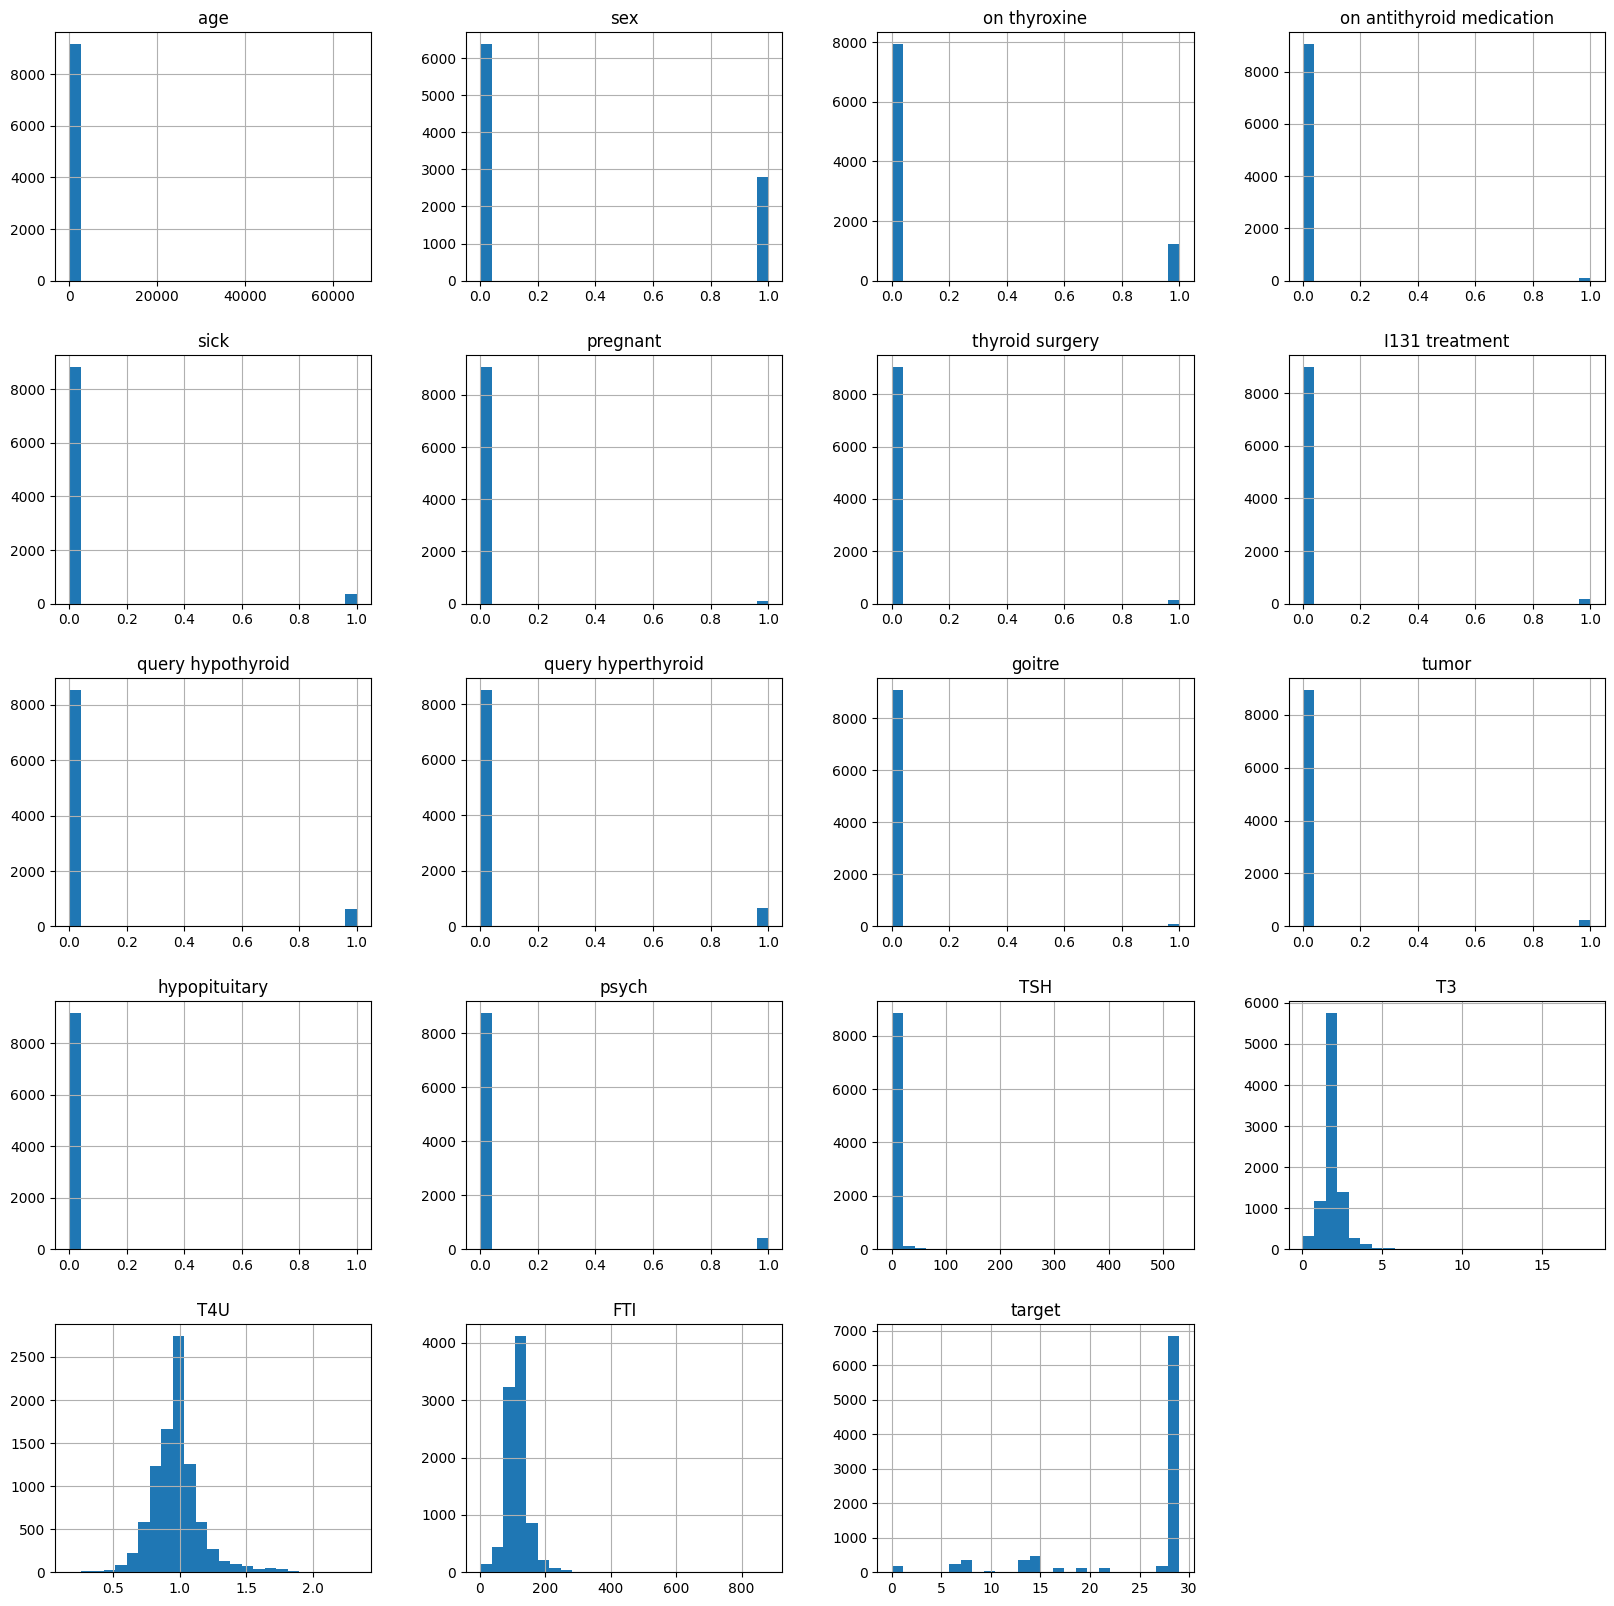

In [25]:
data.hist(bins=25,figsize=(20,20));

In [26]:
data=data.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9063 entries, 0 to 9170
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        9063 non-null   float64
 1   sex                        9063 non-null   float64
 2   on thyroxine               9063 non-null   int32  
 3   on antithyroid medication  9063 non-null   int32  
 4   sick                       9063 non-null   int32  
 5   pregnant                   9063 non-null   int32  
 6   thyroid surgery            9063 non-null   int32  
 7   I131 treatment             9063 non-null   int32  
 8   query hypothyroid          9063 non-null   int32  
 9   query hyperthyroid         9063 non-null   int32  
 10  goitre                     9063 non-null   int32  
 11  tumor                      9063 non-null   int32  
 12  hypopituitary              9063 non-null   int32  
 13  psych                      9063 non-null   int32  
 1

In [27]:
data.describe()

,age,sex,on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,goitre,tumor,hypopituitary,psych,TSH,T3,T4U,FTI,target
count,9063.000000,9063.000000,9063.000000,9063.000000,9063.000000,9063.000000,9063.000000,9063.000000,9063.000000,9063.000000,9063.000000,9063.000000,9063.000000,9063.000000,9063.000000,9063.000000,9063.000000,9063.000000,9063.000000
mean,73.915481,0.306742,0.136489,0.012689,0.037846,0.011806,0.014785,0.018647,0.069293,0.071168,0.009268,0.026371,0.000221,0.046122,5.219941,1.970619,0.976066,113.643314,24.872669
std,1191.070119,0.461167,0.343326,0.111934,0.190835,0.108019,0.120700,0.135283,0.253965,0.257120,0.095831,0.160245,0.014854,0.209760,23.185149,0.755570,0.192459,39.928562,7.905639
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005000,0.050000,0.170000,1.400000,0.000000
25%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.560000,1.700000,0.870000,95.000000,27.000000
50%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,1.970629,0.976056,112.000000,29.000000
75%,68.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.500000,2.200000,1.050000,126.000000,29.000000
max,65526.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,530.000000,18.000000,2.330000,881.000000,29.000000


In [28]:
data.head()

,age,sex,on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,goitre,tumor,hypopituitary,psych,TSH,T3,T4U,FTI,target
0,29.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1.600000,1.900000,0.976056,113.640746,29
1,41.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,5.218993,1.970629,0.976056,113.640746,29
2,36.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,5.218993,1.970629,0.976056,113.640746,29
3,32.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,5.218993,1.970629,0.976056,113.640746,28
4,60.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,5.218993,1.970629,0.976056,113.640746,29
